In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import re
%matplotlib inline

In [3]:
df = pd.read_csv('data/stock_data.csv')
df

,time,open,high,low,close,Volume,Volume MA,RSI,CCI,Plot,Plot.1
0,1609459200,0.004683,0.004702,0.004616,0.004702,1865676.0,NaN,NaN,NaN,NaN,NaN
1,1609462800,0.004705,0.004766,0.004701,0.004727,1082226.0,NaN,NaN,NaN,NaN,NaN
2,1609466400,0.004733,0.004765,0.004733,0.004765,85161.0,NaN,NaN,NaN,NaN,NaN
3,1609470000,0.004754,0.005001,0.004754,0.004976,5030766.0,NaN,NaN,NaN,NaN,NaN
4,1609473600,0.005000,0.005001,0.004816,0.004917,5531754.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16870,1670241600,0.106720,0.106760,0.105800,0.105930,14095010.0,33668016.40,56.656069,67.917784,15.987122,19.185252
16871,1670245200,0.105920,0.106220,0.104040,0.104490,32317575.0,34485251.20,49.487025,-21.792511,13.965515,18.989910
16872,1670248800,0.104490,0.104810,0.104050,0.104560,28471456.0,34507188.55,49.819432,-20.774315,13.947687,18.886065
16873,1670252400,0.104560,0.104560,0.102000,0.102980,83304122.0,37513687.60,42.949268,-113.742046,6.001206,18.434064


In [4]:
df['time'] = pd.to_datetime(df['time'],unit='s')
df.head()

,time,open,high,low,close,Volume,Volume MA,RSI,CCI,Plot,Plot.1
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,0.004702,1865676.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,0.004727,1082226.0,NaN,NaN,NaN,NaN,NaN
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,0.004765,85161.0,NaN,NaN,NaN,NaN,NaN
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,0.004976,5030766.0,NaN,NaN,NaN,NaN,NaN
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,0.004917,5531754.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_todrop = df.iloc[:,[0,1,2,3,4,5]]
df_todrop.head()

,time,open,high,low,close,Volume
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,0.004702,1865676.0
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,0.004727,1082226.0
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,0.004765,85161.0
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,0.004976,5030766.0
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,0.004917,5531754.0


In [6]:
df_todrop['percent'] = ''
df_todrop.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40560\1888032433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todrop['percent'] = ''


,time,open,high,low,close,Volume,percent
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,0.004702,1865676.0,
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,0.004727,1082226.0,
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,0.004765,85161.0,
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,0.004976,5030766.0,
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,0.004917,5531754.0,


In [7]:
df_todrop['value'] = df_todrop['close'] - df_todrop['open']
df_todrop['percent'] = ((df_todrop['close'] - df_todrop['open'])/df_todrop['open']) * 100
df_todrop['percent'] = df_todrop['percent'].round(2)
df_todrop.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40560\821773560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todrop['value'] = df_todrop['close'] - df_todrop['open']
C:\Users\andre\AppData\Local\Temp\ipykernel_40560\821773560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todrop['percent'] = ((df_todrop['close'] - df_todrop['open'])/df_todrop['open']) * 100
C:\Users\andre\AppData\Local\Temp\ipykernel_40560\821773560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,time,open,high,low,close,Volume,percent,value
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083


In [8]:
df_todrop.to_csv('data\dataprices2.csv', index=False)

In [31]:
#Check
df1 = pd.read_csv('data/dataprices2.csv')
df1

,time,open,high,low,close,Volume,percent,value
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083
...,...,...,...,...,...,...,...,...
16870,2022-12-05 12:00:00,0.106720,0.106760,0.105800,0.105930,14095010.0,-0.74,-0.000790
16871,2022-12-05 13:00:00,0.105920,0.106220,0.104040,0.104490,32317575.0,-1.35,-0.001430
16872,2022-12-05 14:00:00,0.104490,0.104810,0.104050,0.104560,28471456.0,0.07,0.000070
16873,2022-12-05 15:00:00,0.104560,0.104560,0.102000,0.102980,83304122.0,-1.51,-0.001580


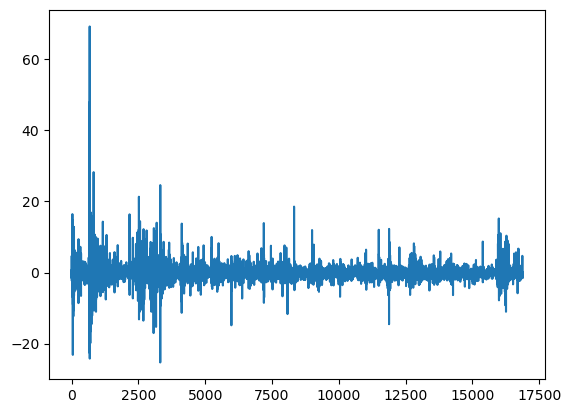

In [3]:
plt.plot(df1['percent'])

In [20]:
df1['check_percent'] = np.where(df1['percent']>2, '1', '0')
df1['check_percent'].value_counts()

0    15873
1     1002
Name: check_percent, dtype: int64

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16875 entries, 0 to 16874
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           16875 non-null  object 
 1   open           16875 non-null  float64
 2   high           16875 non-null  float64
 3   low            16875 non-null  float64
 4   close          16875 non-null  float64
 5   Volume         16875 non-null  float64
 6   percent        16875 non-null  float64
 7   value          16875 non-null  float64
 8   check_percent  16875 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='percent'>

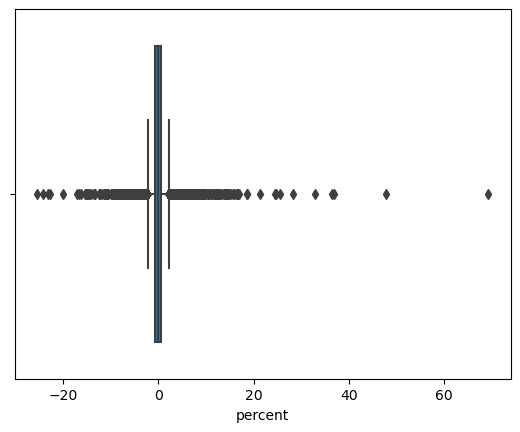

In [27]:
sns.boxplot(x=df1['percent'])

<AxesSubplot:xlabel='percent', ylabel='Count'>

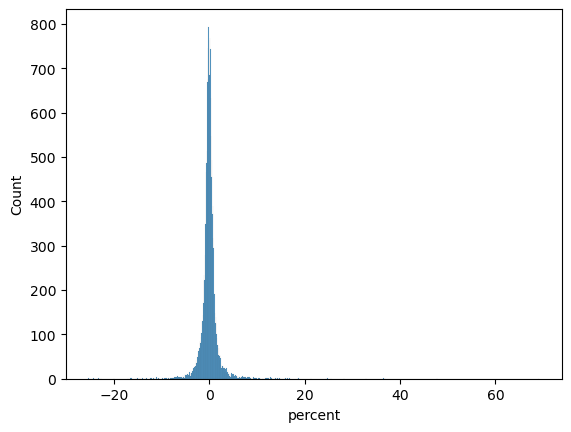

In [29]:
sns.histplot(x=df1['percent'])

In [32]:
df_try = df1.copy()
df_try

,time,open,high,low,close,Volume,percent,value
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083
...,...,...,...,...,...,...,...,...
16870,2022-12-05 12:00:00,0.106720,0.106760,0.105800,0.105930,14095010.0,-0.74,-0.000790
16871,2022-12-05 13:00:00,0.105920,0.106220,0.104040,0.104490,32317575.0,-1.35,-0.001430
16872,2022-12-05 14:00:00,0.104490,0.104810,0.104050,0.104560,28471456.0,0.07,0.000070
16873,2022-12-05 15:00:00,0.104560,0.104560,0.102000,0.102980,83304122.0,-1.51,-0.001580


In [70]:
df_try['tv'] = ''
#df_try['tv'].value_counts()
#df_try.head()
#df_try.shape
#df_try.info()

0     3508
-1    2229
1     2186
2     2111
-2    2033
5     1002
-3    1000
-5     971
3      866
-4     511
4      458
Name: tv, dtype: int64

In [69]:
df_try['tv']=df_try['percent'].apply(lambda x: '0' if x<=0.2 and x>=-0.2
                                     else '1' if x>0.2 and x<=0.5 
                                     else '2' if x>0.5 and x<=1 
                                     else '3' if x>1 and x<=1.5
                                     else '4' if x>1.5 and x<=2
                                     else '5' if x>2
                                     else '-1' if x<-0.2 and x>=-0.5
                                     else '-2' if x<-0.5 and x>=-1
                                     else '-3' if x<-1 and x>=-1.5
                                     else '-4' if x<-1.5 and x>=-2
                                     else '-5')


<AxesSubplot:xlabel='tv', ylabel='Count'>

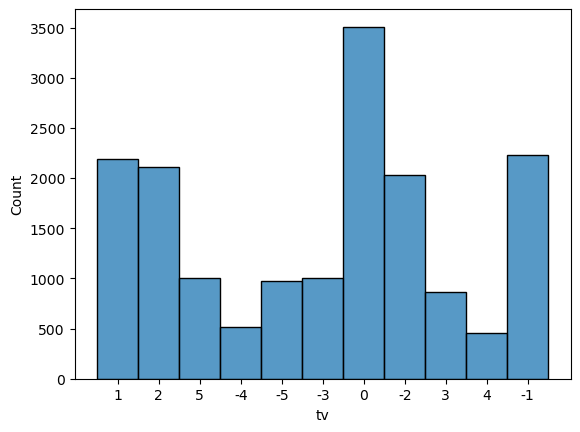

In [71]:
sns.histplot(x=df_try['tv'])


In [72]:
df_try.head()

,time,open,high,low,close,Volume,percent,value,tv
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019,1
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022,1
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032,2
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222,5
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083,-4


In [78]:
df_try.to_csv('data/dataprices_ish.csv', index=False)

In [75]:
#Check
df1 = pd.read_csv('data/dataprices_ish.csv')
df1

,time,open,high,low,close,Volume,percent,value,tv
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019,1
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022,1
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032,2
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222,5
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083,-4
...,...,...,...,...,...,...,...,...,...
16870,2022-12-05 12:00:00,0.106720,0.106760,0.105800,0.105930,14095010.0,-0.74,-0.000790,-2
16871,2022-12-05 13:00:00,0.105920,0.106220,0.104040,0.104490,32317575.0,-1.35,-0.001430,-3
16872,2022-12-05 14:00:00,0.104490,0.104810,0.104050,0.104560,28471456.0,0.07,0.000070,0
16873,2022-12-05 15:00:00,0.104560,0.104560,0.102000,0.102980,83304122.0,-1.51,-0.001580,-4


In [76]:
df_tomodel = df1.drop(['close', 'percent', 'value'], axis=1)


In [77]:
df_tomodel

,time,open,high,low,Volume,tv
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,1865676.0,1
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,1082226.0,1
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,85161.0,2
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,5030766.0,5
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,5531754.0,-4
...,...,...,...,...,...,...
16870,2022-12-05 12:00:00,0.106720,0.106760,0.105800,14095010.0,-2
16871,2022-12-05 13:00:00,0.105920,0.106220,0.104040,32317575.0,-3
16872,2022-12-05 14:00:00,0.104490,0.104810,0.104050,28471456.0,0
16873,2022-12-05 15:00:00,0.104560,0.104560,0.102000,83304122.0,-4


In [79]:
df_tomodel.to_csv('data/dataprices.csv', index=False)

In [80]:
#Check
df12 = pd.read_csv('data/dataprices.csv')
df12

,time,open,high,low,Volume,tv
0,2021-01-01 00:00:00,0.004683,0.004702,0.004616,1865676.0,1
1,2021-01-01 01:00:00,0.004705,0.004766,0.004701,1082226.0,1
2,2021-01-01 02:00:00,0.004733,0.004765,0.004733,85161.0,2
3,2021-01-01 03:00:00,0.004754,0.005001,0.004754,5030766.0,5
4,2021-01-01 04:00:00,0.005000,0.005001,0.004816,5531754.0,-4
...,...,...,...,...,...,...
16870,2022-12-05 12:00:00,0.106720,0.106760,0.105800,14095010.0,-2
16871,2022-12-05 13:00:00,0.105920,0.106220,0.104040,32317575.0,-3
16872,2022-12-05 14:00:00,0.104490,0.104810,0.104050,28471456.0,0
16873,2022-12-05 15:00:00,0.104560,0.104560,0.102000,83304122.0,-4
